In [1]:
import torch
import matplotlib.pyplot as plt
from torch_attention.shared import ScaledDotProductAttention

In [2]:
# Randomly generated Q, K, V
batch_size = 32
num_heads = 4
seq_len = 96
head_dim = 16

Q = torch.randn(batch_size, num_heads, seq_len, head_dim)
K = torch.randn(batch_size, num_heads, seq_len, head_dim)
V = torch.randn(batch_size, num_heads, seq_len, head_dim)

In [3]:
# Instantiated attention class
attention = ScaledDotProductAttention(
    use_mask=True,  # will use triangular as default
    dropout_rate=0.0,
    output_attention_scores=True,
    strict_mode=True,
    custom_scale_factor=None,  # will use sqrt(head_dim) as default
)

In [4]:
# Output and weights
out, weights = attention(query=Q, key=K, value=V)

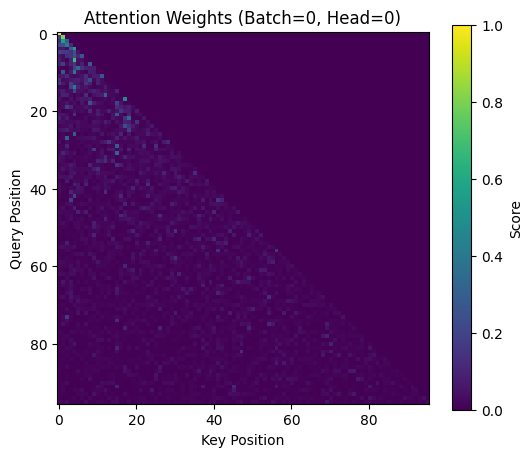

In [5]:
# Batch 0, head 0 visualized
b, h = 0, 0
w = weights[b, h].detach().cpu().numpy()

plt.figure(figsize=(6,5))
plt.imshow(w)
plt.title(f"Attention Weights (Batch={b}, Head={h})")
plt.xlabel("Key Position")
plt.ylabel("Query Position")
plt.colorbar(label="Score")
plt.show()